In [1]:
import pandas as pd
from google.colab import drive
import numpy as np

drive.mount('/content/drive')
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/amostra_nba_2.xlsx')
df_teste = pd.read_excel('/content/drive/My Drive/Colab Notebooks/amostra_nba_testeknn.xlsx')

Mounted at /content/drive


### Componentes Principais

In [2]:
#matriz não normalizada
df_posicao = df[df['Pos_y'].isin(['PF','PG','SF','SG','C'])][['Pos_y',	'PTS', 'Min',	'FG%',	'AST',	'3P%',	'FT%',	'REB',	'TOV',	'STL',	'BLK',	'PF',	'FP',	'Altura',	'Peso']]
df_stat = df_posicao.groupby('Pos_y').mean()
df_stat

,PTS,Min,FG%,AST,3P%,FT%,REB,TOV,STL,BLK,PF,FP,Altura,Peso
Pos_y,,,,,,,,,,,,,,
C,8.769122,21.731280,0.507728,1.214304,0.183397,0.677168,6.254590,1.295018,0.517180,1.002963,2.448321,21.362393,2.114314,118.289902
PF,10.277919,23.946403,0.486025,1.485009,0.244005,0.722941,6.004235,1.309412,0.615896,0.658156,2.398831,22.224086,2.069794,112.158454
PG,10.187726,24.742104,0.426436,4.202746,0.338640,0.789841,2.768041,1.707272,0.963864,0.190106,1.873130,21.568938,1.892376,88.023168
SF,10.561320,25.001385,0.445612,1.871038,0.339780,0.753984,4.241860,1.294589,0.862519,0.448617,2.015961,21.097905,2.015941,99.816832
SG,11.412581,25.796414,0.434427,2.253391,0.354241,0.790020,3.151754,1.353492,0.832751,0.275957,1.894206,20.548410,1.965922,94.522718


In [3]:
#matriz padronizada
df_padrao = df_stat.copy()
for col in list(df_padrao.columns):
  media = df_padrao[col].mean()
  desvp = df_padrao[col].std()
  for index,row in df_padrao.iterrows():
    pdz = (row[col] - media)/desvp
    df_padrao[col][index] = pdz
df_padrao

<ipython-input-3-35be793a0d6d>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_padrao[col][index] = pdz


,PTS,Min,FG%,AST,3P%,FT%,REB,TOV,STL,BLK,PF,FP,Altura,Peso
Pos_y,,,,,,,,,,,,,,
C,-1.542482,-1.618774,1.356454,-0.837189,-1.450459,-1.452531,1.107417,-0.544901,-1.303268,1.495271,1.161038,0.003323,1.180206,1.260230
PF,0.037903,-0.191447,0.739037,-0.608498,-0.641091,-0.497566,0.950824,-0.463995,-0.770017,0.438328,0.982718,1.402243,0.668316,0.768929
PG,-0.056570,0.321267,-0.956102,1.687440,0.622666,0.898151,-1.073366,1.772425,1.109666,-0.996392,-0.911444,0.338639,-1.371634,-1.164987
SF,0.334749,0.488336,-0.410600,-0.282382,0.637886,0.150066,-0.151515,-0.547315,0.562211,-0.203975,-0.396808,-0.426062,0.049111,-0.219982
SG,1.226400,1.000618,-0.728789,0.040629,0.830998,0.901880,-0.833360,-0.216214,0.401407,-0.733233,-0.835505,-1.318142,-0.526000,-0.644190


In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
df_pca = pca.fit_transform(df_padrao)

In [5]:
#contribuição da var da amostra
pca.explained_variance_ratio_

array([8.04040815e-01, 1.32353149e-01, 5.37788257e-02, 9.82720978e-03,
       2.49605948e-33])

In [6]:
#coef da combinação linear das v.o.
pca.components_

array([[-0.22470682, -0.2632519 ,  0.2969254 , -0.2412605 , -0.28602735,
        -0.29437407,  0.29286835, -0.19115423, -0.28921713,  0.29451236,
         0.29242154,  0.13082789,  0.28682941,  0.29626497],
       [-0.39609321, -0.27637576,  0.03234625,  0.42794201, -0.17718499,
        -0.05061201, -0.02378806,  0.55684793,  0.05791934, -0.0012906 ,
         0.05639643,  0.43481596, -0.19293737, -0.07153845],
       [ 0.39495425,  0.32255495,  0.01014682, -0.06950489,  0.06543085,
         0.11904276,  0.20230912, -0.07286815, -0.01479206, -0.17381056,
         0.19585207,  0.77339047,  0.0254945 ,  0.05267535],
       [-0.4130042 , -0.01576773, -0.20087663, -0.11495064,  0.35853587,
        -0.25765569,  0.13848969, -0.27131574,  0.61505564,  0.0801781 ,
        -0.13939337,  0.2201858 ,  0.17973448, -0.05430503],
       [-0.4598627 ,  0.04798401,  0.33593217, -0.22199452,  0.11282477,
         0.48392292, -0.45458729, -0.26088677, -0.12306401, -0.08310819,
        -0.04575082,  0.18

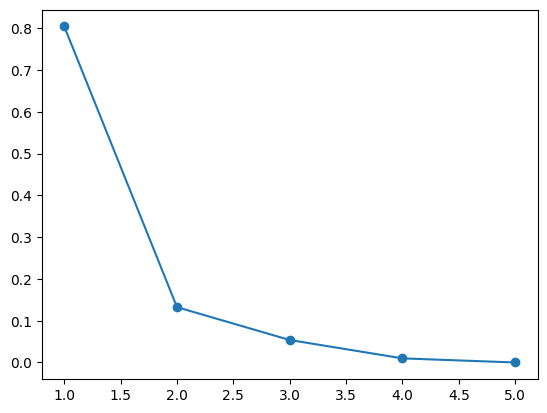

In [7]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4,5], pca.explained_variance_ratio_, marker='o')

In [8]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_padrao)

In [9]:
print('As 3 primeiras componentes principais explicam cerca de '+  str(round(np.sum(pca.explained_variance_ratio_)*100,2))+'%'  + ' da vaiabilidade total dos dados')

As 3 primeiras componentes principais explicam cerca de 99.02% da vaiabilidade total dos dados


In [10]:
df_comp = pd.DataFrame(columns=list(df_padrao.columns))
for cp in pca.components_:
  df_comp.loc[len(df_comp)] = cp
df_comp

,PTS,Min,FG%,AST,3P%,FT%,REB,TOV,STL,BLK,PF,FP,Altura,Peso
0,-0.224707,-0.263252,0.296925,-0.241261,-0.286027,-0.294374,0.292868,-0.191154,-0.289217,0.294512,0.292422,0.130828,0.286829,0.296265
1,-0.396093,-0.276376,0.032346,0.427942,-0.177185,-0.050612,-0.023788,0.556848,0.057919,-0.001291,0.056396,0.434816,-0.192937,-0.071538
2,0.394954,0.322555,0.010147,-0.069505,0.065431,0.119043,0.202309,-0.072868,-0.014792,-0.173811,0.195852,0.773390,0.025495,0.052675


In [11]:
df_comp

,PTS,Min,FG%,AST,3P%,FT%,REB,TOV,STL,BLK,PF,FP,Altura,Peso
0,-0.224707,-0.263252,0.296925,-0.241261,-0.286027,-0.294374,0.292868,-0.191154,-0.289217,0.294512,0.292422,0.130828,0.286829,0.296265
1,-0.396093,-0.276376,0.032346,0.427942,-0.177185,-0.050612,-0.023788,0.556848,0.057919,-0.001291,0.056396,0.434816,-0.192937,-0.071538
2,0.394954,0.322555,0.010147,-0.069505,0.065431,0.119043,0.202309,-0.072868,-0.014792,-0.173811,0.195852,0.773390,0.025495,0.052675


### APlicando as C.P

In [ ]:
df_jogadores = df[df['Pos_y'].isin(['PF','PG','SF','SG','C'])][['Player','Pos_y',	'PTS', 'Min',	'FG%',	'AST',	'3P%',	'FT%',	'REB',	'TOV',	'STL',	'BLK',	'PF',	'FP',	'Altura',	'Peso']]

for col in ['PTS', 'Min',	'FG%',	'AST',	'3P%',	'FT%',	'REB',	'TOV',	'STL',	'BLK',	'PF',	'FP',	'Altura',	'Peso']:
  media = df_jogadores[col].mean()
  desvp = df_jogadores[col].std()
  for index,row in df_jogadores.iterrows():
    pdz = (row[col] - media)/desvp
    df_jogadores[col][index] = pdz
df_jogadores


In [13]:
df_jogadores['CP1'],df_jogadores['CP2'],df_jogadores['CP3'] = 0,0,0

In [14]:
df_jogadores

,Player,Pos_y,PTS,Min,FG%,AST,3P%,FT%,REB,TOV,STL,BLK,PF,FP,Altura,Peso,CP1,CP2,CP3
0,Eldridge Recasner,PG,-0.908708,-1.166918,-0.589243,-0.420765,0.971946,1.599765,-1.237740,-0.519607,-0.876915,-1.071832,-1.567213,-1.269706,-1.155515,-1.345186,0,0,0
1,Tyrone Corbin,SG,-0.482006,0.408520,-0.966680,-0.421725,0.336726,0.178567,-0.345052,-0.708864,0.666593,-0.921835,0.008546,-0.515873,-0.356484,-0.596914,0,0,0
2,Antoine Walker,SF,1.427608,1.703351,-0.922510,0.825695,0.286586,-1.254675,1.443694,2.156950,1.282361,0.024718,1.273151,1.515026,0.556695,-0.073042,0,0,0
3,David Wesley,PG,0.655703,1.611200,-0.746601,1.392997,0.608175,0.479381,-0.823237,0.924477,1.812720,-0.737650,0.744002,0.557046,-2.068694,-1.345186,0,0,0
4,Rick Fox,SF,-0.131064,0.480857,-0.396969,0.484852,0.491053,0.277942,-0.264514,0.479954,0.777377,-0.382108,1.614621,-0.023705,-0.014042,0.152182,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,Gary Trent Jr.,SG,0.648210,0.569257,-0.826388,-0.451391,0.855974,0.693996,-0.949756,-1.082673,0.974023,-0.679902,-1.054291,0.054224,-0.584779,-0.634039,0,0,0
500,Marvin Bagley III,PF,0.568688,-0.017558,1.132562,-0.773306,0.046235,-0.716302,1.174394,-0.196141,-0.808251,0.328001,-0.184408,0.447909,0.784989,0.338632,0,0,0
501,Drew Eubanks,C,-0.900809,-1.497724,2.668708,-0.827752,0.763293,0.122644,-0.056655,-0.780167,-1.183845,0.416662,-1.103178,-0.799234,0.556695,0.713180,0,0,0
502,Lonnie Walker IV,SG,-0.153089,-0.692777,-0.880897,-0.425255,0.540252,0.317639,-0.953081,-0.777377,-0.613676,-0.547711,-1.447901,-0.606599,-0.927221,-0.821313,0,0,0


In [15]:
df_comp

,PTS,Min,FG%,AST,3P%,FT%,REB,TOV,STL,BLK,PF,FP,Altura,Peso
0,-0.224707,-0.263252,0.296925,-0.241261,-0.286027,-0.294374,0.292868,-0.191154,-0.289217,0.294512,0.292422,0.130828,0.286829,0.296265
1,-0.396093,-0.276376,0.032346,0.427942,-0.177185,-0.050612,-0.023788,0.556848,0.057919,-0.001291,0.056396,0.434816,-0.192937,-0.071538
2,0.394954,0.322555,0.010147,-0.069505,0.065431,0.119043,0.202309,-0.072868,-0.014792,-0.173811,0.195852,0.773390,0.025495,0.052675


In [16]:
for index,row in df_jogadores.iterrows():
  pc1,pc2,pc3 = 0,0,0
  for col in ['PTS', 'Min',	'FG%',	'AST',	'3P%',	'FT%',	'REB',	'TOV',	'STL',	'BLK',	'PF',	'FP',	'Altura',	'Peso']:
    pc1 += row[col]*df_comp.loc[0][col]
    pc2 += row[col]*df_comp.loc[1][col]
    pc3 += row[col]*df_comp.loc[2][col]
  df_jogadores['CP1'][index],df_jogadores['CP2'][index],df_jogadores['CP3'][index] = pc1,pc2,pc3

<ipython-input-16-883d5e2e5983>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_jogadores['CP1'][index],df_jogadores['CP2'][index],df_jogadores['CP3'][index] = pc1,pc2,pc3
<ipython-input-16-883d5e2e5983>:7: SettingWithCopyWarning: 
A val

In [17]:
df_jogadores.value_counts('Pos_y')

,count
Pos_y,
SG,103
C,102
PG,101
SF,101
PF,97


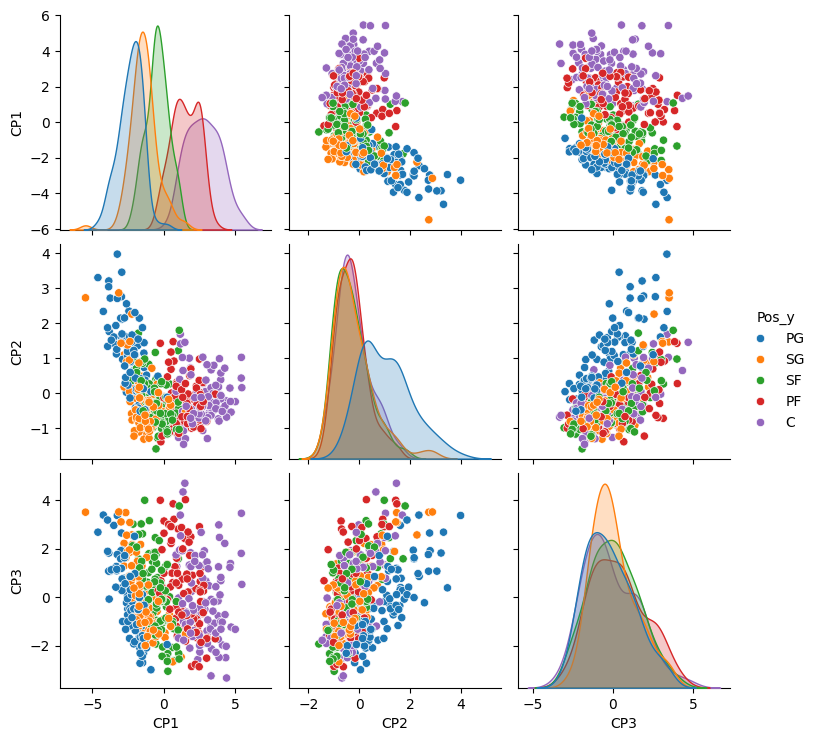

In [18]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.pairplot(df_jogadores[['Pos_y','CP1','CP2','CP3']],hue = 'Pos_y')

In [ ]:
#trazendo outros jogadores para o teste
df_teste.fillna(0,inplace = True)
df_teste_ajust = df_teste[(df_teste['GP']>20) & (df_teste['Temporadas']> 4 )]

for col in ['PTS', 'Min',	'FG%',	'AST',	'3P%',	'FT%',	'REB',	'TOV',	'STL',	'BLK',	'PF',	'FP',	'Altura',	'Peso']:
  media = df_teste_ajust[col].mean()
  desvp = df_teste_ajust[col].std()
  for index,row in df_teste_ajust.iterrows():
    pdz = (row[col] - media)/desvp
    df_teste_ajust[col][index] = pdz


df_teste_ajust['CP1'],df_teste_ajust['CP2'],df_teste_ajust['CP3'] = 0,0,0

for index,row in df_teste_ajust.iterrows():
  pc1,pc2,pc3 = 0,0,0
  for col in ['PTS', 'Min',	'FG%',	'AST',	'3P%',	'FT%',	'REB',	'TOV',	'STL',	'BLK',	'PF',	'FP',	'Altura',	'Peso']:
    pc1 += row[col]*df_comp.loc[0][col]
    pc2 += row[col]*df_comp.loc[1][col]
    pc3 += row[col]*df_comp.loc[2][col]
  df_teste_ajust['CP1'][index],df_teste_ajust['CP2'][index],df_teste_ajust['CP3'][index] = pc1,pc2,pc3
df_teste_ajust

In [20]:
#treinando o mmodelo
from sklearn.neighbors import KNeighborsClassifier
classe  = KNeighborsClassifier(n_neighbors=3)

X,y = df_jogadores[['CP1','CP2','CP3']], df_jogadores['Pos_y']

result = classe.fit(X, y)


In [21]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Fazendo previsões no conjunto de teste
y_pred = classe.predict(df_teste_ajust[['CP1','CP2','CP3']])

# Calculando a acurácia
acuracia = accuracy_score(df_teste_ajust['Pos_y'], y_pred)
print(f"Acurácia do modelo KNN: {acuracia * 100:.2f}%")

# Exibindo o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(df_teste_ajust['Pos_y'], y_pred))


Acurácia do modelo KNN: 47.52%

Relatório de Classificação:
              precision    recall  f1-score   support

           C       0.68      0.48      0.56       141
          PF       0.48      0.41      0.44       156
          PG       0.68      0.54      0.60       112
          SF       0.15      0.63      0.24        35
          SG       0.56      0.45      0.50       141

    accuracy                           0.48       585
   macro avg       0.51      0.50      0.47       585
weighted avg       0.57      0.48      0.50       585

